<a href="https://colab.research.google.com/github/Barrok/auto-mpg/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
#Load required libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as Agnes

# Data Input

In [ ]:
# load data
df = pd.read_fwf("auto-mpg.data", header = None)

# check how data frame looks like
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


# Data Manipulation

In [ ]:
# list contains column names
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# assign names to columns
df.columns = col_names
df['model_year'] = df['model_year'] + 1900
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,1982,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,1982,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,1982,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,1982,1,"""ford ranger"""


In [ ]:
# check if there are any missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
# basic statistics of data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,1976.010050,3.697627,1970.0,1973.000,1976.0,1979.000,1982.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Data Exploration

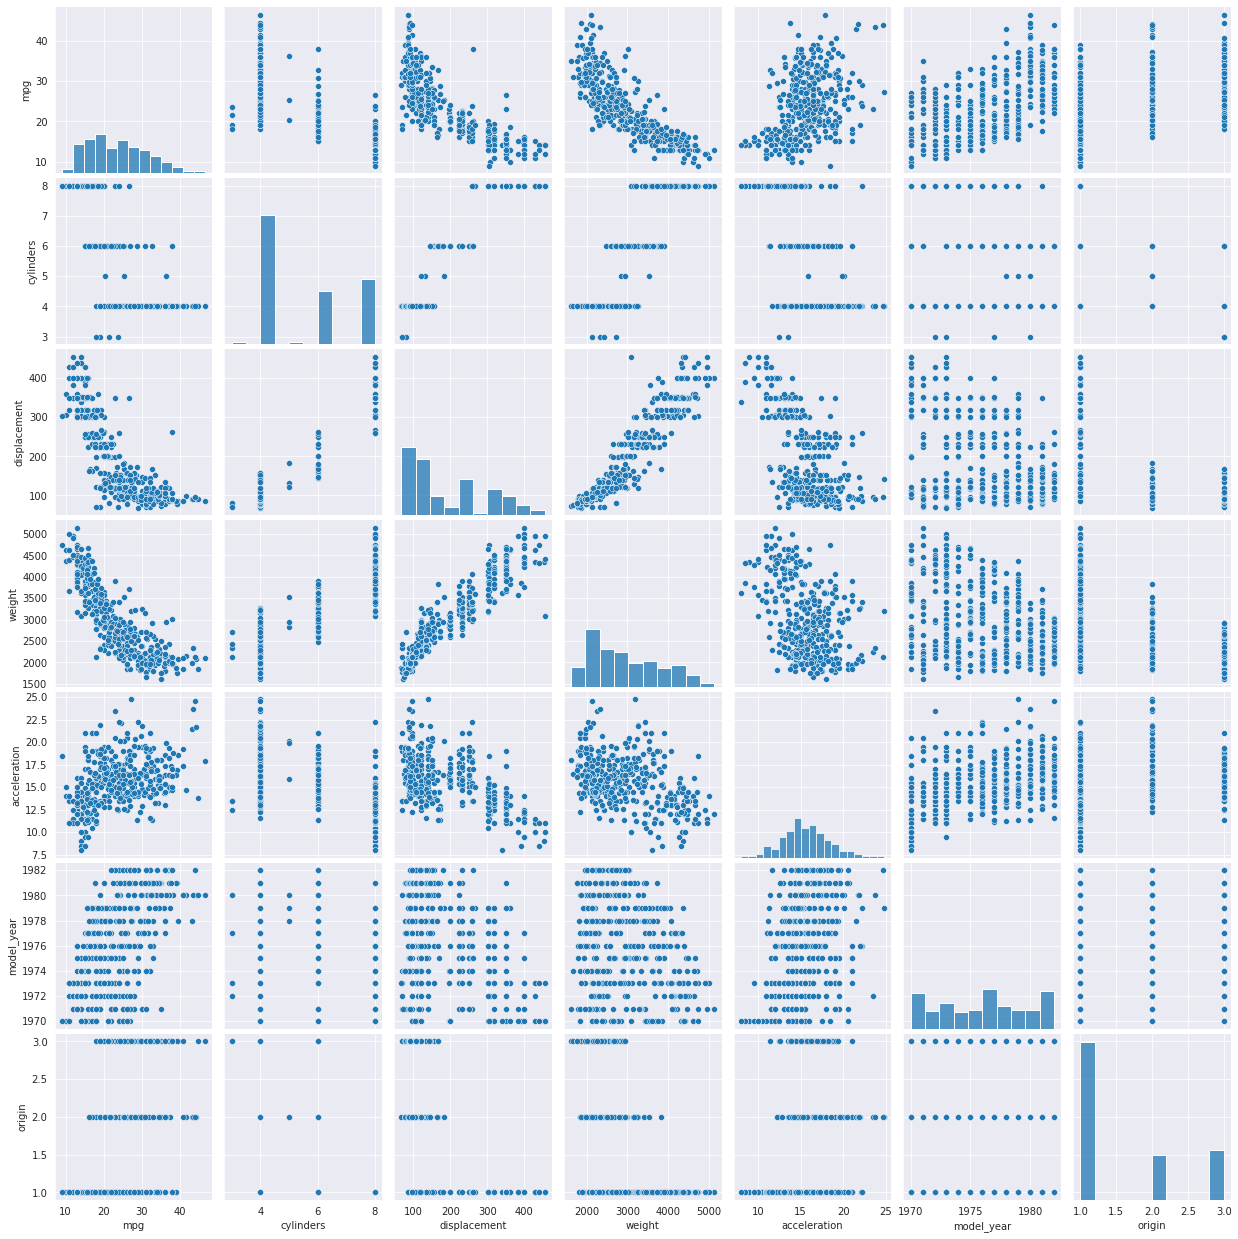

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

sns.pairplot(df)

In [ ]:
from scipy.stats import zscore
#dropping the Column name "car_name"
df1 = df.drop(['car_name'], axis = 1)
df1.dropna(inplace=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1


In [ ]:
# check what types are variables
print(df1.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [ ]:
# horsepower is a string, so I'll have to change it into float before standarization
df1['horsepower'] = df1['horsepower'].replace('?', "0")
df1['horsepower'] = df1['horsepower'].astype('float')
print(df1.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [ ]:
# standarization
dfst = df1.apply(zscore)
dfst.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145


# ML Models

## K-means

Text(0.5, 1.0, 'Selecting number od clusters with the Elbow Method')

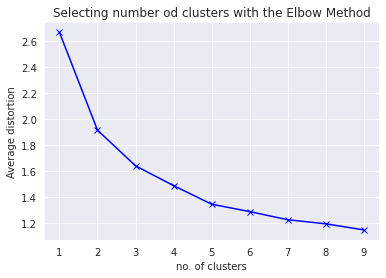

In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfst)
    prediction=model.predict(dfst)
    meanDistortions.append(sum(np.min(cdist(dfst, model.cluster_centers_, 'euclidean'), axis=1)) / dfst.shape[0])

# visualization 
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('no. of clusters')
plt.ylabel('Average distortion')
plt.title('Selecting number od clusters with the Elbow Method')

In [ ]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(dfst)
prediction=final_model.predict(dfst)

#Append the prediction 
df1["GROUP"] = prediction
dfst["GROUP"] = prediction
print("Groups Assigned : \n")
dfst.head()

Groups Assigned : 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145,0
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145,0
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145,0
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145,0
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145,0


In [ ]:
dclust = dfst.groupby(['GROUP'])
dclust.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
GROUP,,,,,,,,
0,-0.909728,1.042705,1.024129,0.831569,0.970343,-0.446585,-0.444357,-0.692853
1,0.664497,-0.761628,-0.748059,-0.607407,-0.708773,0.326201,0.324574,0.506084


In [ ]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(dfst)
prediction=final_model.predict(dfst)

#Append the prediction 
df1["GROUP"] = prediction
dfst["GROUP"] = prediction
print("Groups Assigned : \n")
dfst.head()

Groups Assigned : 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145,0
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145,0
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145,0
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145,0
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145,0


In [ ]:
dclust1 = dfst.groupby(['GROUP'])
dclust1.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
GROUP,,,,,,,,
0,-1.163797,1.498191,1.503923,1.479382,1.404098,-1.086149,-0.688324,-0.715145
1,0.702588,-0.816004,-0.784419,-0.619428,-0.741227,0.338357,0.305156,0.567424
2,-0.523175,0.445586,0.357871,-0.040084,0.356983,0.329387,-0.025021,-0.671085


In [ ]:
# Setting the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15)
kmeans.fit(dfst)

# centroids
centroids = kmeans.cluster_centers_
centroids

array([[ 7.02588027e-01, -8.16003588e-01, -7.84419113e-01,
        -6.19428260e-01, -7.41227338e-01,  3.38356690e-01,
         3.05156410e-01,  5.67423815e-01,  1.00000000e+00],
       [-1.16379715e+00,  1.49819126e+00,  1.50392292e+00,
         1.47938187e+00,  1.40409797e+00, -1.08614860e+00,
        -6.88323847e-01, -7.15144780e-01,  3.33066907e-16],
       [-5.23174662e-01,  4.45585970e-01,  3.57870950e-01,
        -4.00836054e-02,  3.56983265e-01,  3.29386506e-01,
        -2.50213191e-02, -6.71084777e-01,  2.00000000e+00]])

In [ ]:
# Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(dfst))
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP
0,0.702588,-0.816004,-0.784419,-0.619428,-0.741227,0.338357,0.305156,0.567424,1.000000e+00
1,-1.163797,1.498191,1.503923,1.479382,1.404098,-1.086149,-0.688324,-0.715145,3.330669e-16
2,-0.523175,0.445586,0.357871,-0.040084,0.356983,0.329387,-0.025021,-0.671085,2.000000e+00


In [ ]:
centroid_df.mean()


mpg            -0.328128
cylinders       0.375925
displacement    0.359125
horsepower      0.273290
weight          0.339951
acceleration   -0.139468
model_year     -0.136063
origin         -0.272935
GROUP           1.000000
dtype: float64

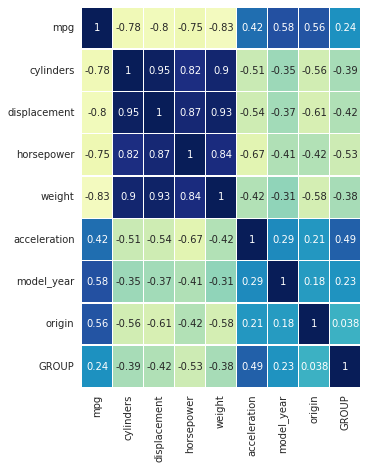

In [ ]:
plt.figure(figsize=(5,7))
sns.heatmap(dfst.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

## Agglomerative Nesting (AGNES) 

In [ ]:
# create a model
model = Agnes(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(dfst)
dfst['labels'] = model.labels_
dfst.head(10)
dfstClust = dfst.groupby(['labels'])
dfstClust.mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,GROUP
labels,,,,,,,,,
0,-0.511780,0.415657,0.339064,-0.097975,0.348765,0.337105,0.006616,-0.672098,1.977011
1,-1.163797,1.498191,1.503923,1.479382,1.404098,-1.086149,-0.688324,-0.715145,0.000000
2,0.709317,-0.815632,-0.787407,-0.601558,-0.748054,0.335345,0.295515,0.579245,1.000000


In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# pairwise distribution between data points is a measure of the correlation between 
# the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

# lets verify which method brings best result with this data

# empty data frame with column names
df = pd.DataFrame(columns = ['Metric', 'Method', 'Score'])


# list of possible metrics
metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed']
# list of possible methods
methods = ['single', 'complete', 'average', 'ward', 'weighted', 'median', 'centroid']
# empty list, scores will be assgined in the future
score = []


# for each metric
for x in metrics:

  # for each method
  for y in methods:
    
    # not all metrics and methods are compatible
    # so such loop requires error exception
    try:
      # perform clustering
      Z = linkage(dfst, metric = x, method = y)
    except ValueError:
      continue

    # compute the cophenetic correlation coefficient for the hierarchical cluster tree represented by Z
    c, coph_dists = cophenet(Z , pdist(dfst))
    # assign metric, method and score to dataframe df
    df = df.append({'Metric': x, 'Method': y, 'Score': c}, ignore_index=True)
    

# print out data frame df
df

,Metric,Method,Score
0,euclidean,single,0.784296
1,euclidean,complete,0.800738
2,euclidean,average,0.797948
3,euclidean,ward,0.776423
4,euclidean,weighted,0.804414
5,euclidean,median,0.775385
6,euclidean,centroid,0.821943
7,cosine,single,0.765894
8,cosine,complete,0.731085
9,cosine,average,0.784485


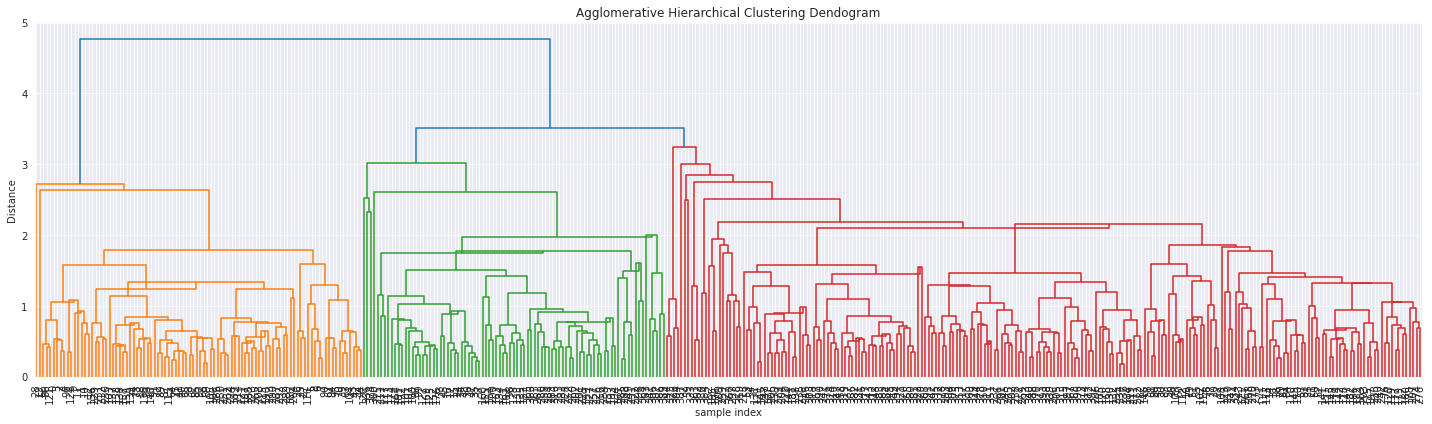

In [ ]:
# this time method 'centroid' wirh euclidean metric gives best result
# lets visualize this bad boy

# assign color to each group(cluster)
colors = dfst.iloc[:, -1].values

# viusualization
plt.figure(figsize=(20, 6))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(linkage(dfst, metric='euclidean', method='centroid'), leaf_rotation=90.,  leaf_font_size=10.)
plt.tight_layout()

In [ ]:
# get unique values and counts of each value
unique, counts = np.unique(colors, return_counts=True)

# display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  0  87]
 [  1  94]
 [  2 217]]


Lets see how variables has been grouped, boxplot will give us the best view on this matter

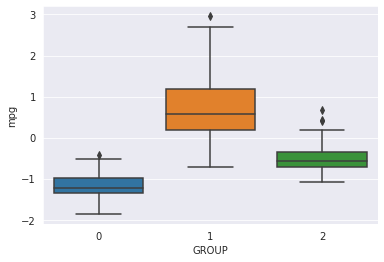

In [ ]:
sns.boxplot(x = dfst['GROUP'],
            y = dfst['mpg'])

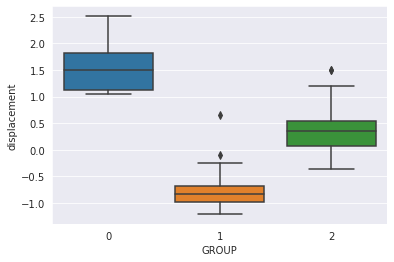

In [ ]:
sns.boxplot(x = dfst['GROUP'],
            y = dfst['displacement'])

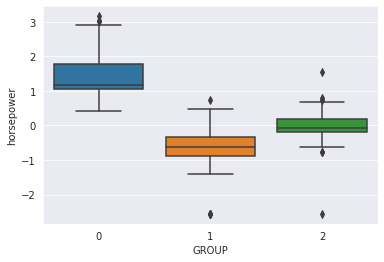

In [ ]:
sns.boxplot(x = dfst['GROUP'],
            y = dfst['horsepower'])

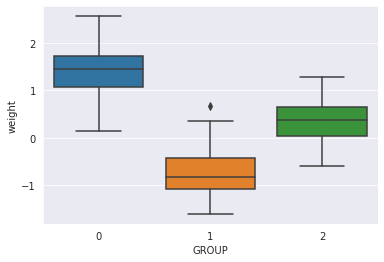

In [ ]:
sns.boxplot(x = dfst['GROUP'],
            y = dfst['weight'])

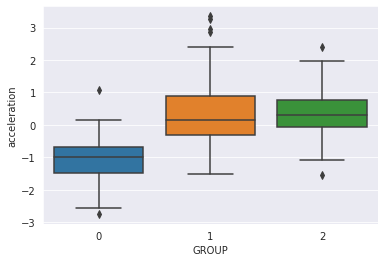

In [ ]:
sns.boxplot(x = dfst['GROUP'],
            y = dfst['acceleration'])

As we can see, most of variables has been grouped quite accurate